In [58]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import copy

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, OneHotEncoder

from fancyimpute import KNN, MICE

In [2]:
train = pd.read_csv('./train (1).csv')

In [3]:
train.shape

(2051, 81)

In [4]:
test = pd.read_csv('./test.csv')

In [5]:
# train_obj = train.select_dtypes(exclude=[np.number])
# train_num = train.select_dtypes(include=[np.number])
# test_obj = test.select_dtypes(exclude=[np.number])
# test_num = test.select_dtypes(include=[np.number])

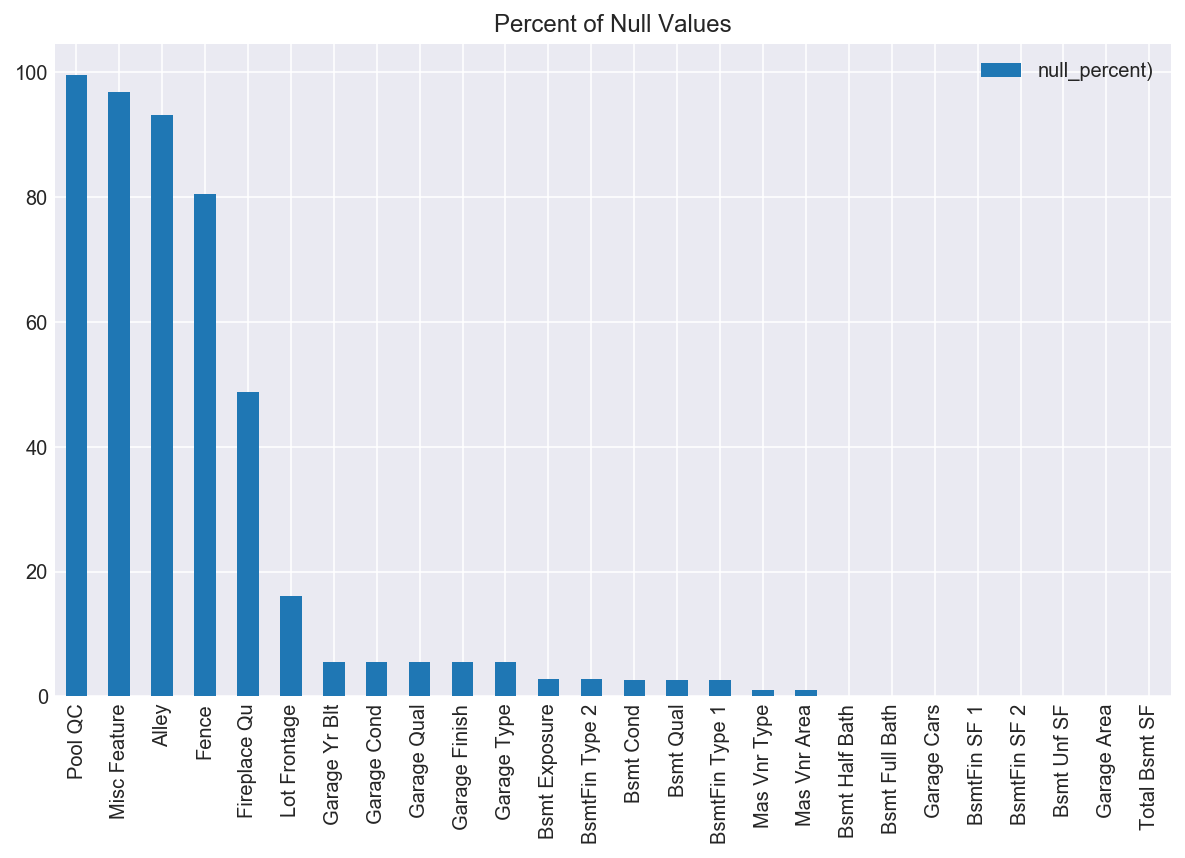

In [6]:
(train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0] * 100.).round(3).sort_values(ascending=False).to_frame('null_percent)').plot(kind='bar', figsize=(10,6), title='Percent of Null Values');

In [7]:
train.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1, inplace=True)

In [8]:
null_values = (train.isnull().sum()[train.isnull().sum() > 0] / train.shape[0] * 100.).round(3).sort_values(ascending=False).to_frame('null_percent)')
len(null_values)

22

In [9]:
len(list(train[null_values.T.columns].select_dtypes(include='number')))

11

In [10]:
train[null_values.T.columns].select_dtypes(include='number').isnull().sum()

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Full Bath      2
Bsmt Half Bath      2
Total Bsmt SF       1
Garage Area         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Garage Cars         1
Bsmt Unf SF         1
dtype: int64

In [11]:
train[null_values.T.columns].select_dtypes(exclude='number').isnull().sum()

Fireplace Qu      1000
Garage Qual        114
Garage Cond        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
dtype: int64

In [12]:
type(train['Fireplace Qu'][0])

float

In [13]:
train.loc[train['Fireplace Qu'].notnull(),'Fireplace Qu']=train['Fireplace Qu'].astype('category').cat.codes
train['Fireplace Qu'].isnull().sum()

1000

In [14]:
train.loc[train['Garage Qual'].notnull(),'Garage Qual']=train['Garage Qual'].astype('category').cat.codes

In [15]:
train.loc[train['Garage Cond'].notnull(),'Garage Cond']=train['Garage Cond'].astype('category').cat.codes

In [16]:
train.loc[train['Garage Finish'].notnull(),'Garage Finish']=train['Garage Finish'].astype('category').cat.codes

In [17]:
train.loc[train['Garage Type'].notnull(),'Garage Type']=train['Garage Type'].astype('category').cat.codes

In [18]:
train.loc[train['Bsmt Exposure'].notnull(),'Bsmt Exposure']=train['Bsmt Exposure'].astype('category').cat.codes

In [19]:
train.loc[train['BsmtFin Type 2'].notnull(),'BsmtFin Type 2']=train['BsmtFin Type 2'].astype('category').cat.codes

In [20]:
train.loc[train['BsmtFin Type 1'].notnull(),'BsmtFin Type 1']=train['BsmtFin Type 1'].astype('category').cat.codes

In [21]:
train.loc[train['Bsmt Cond'].notnull(),'Bsmt Cond']=train['Bsmt Cond'].astype('category').cat.codes

In [22]:
train.loc[train['Bsmt Qual'].notnull(),'Bsmt Qual']=train['Bsmt Qual'].astype('category').cat.codes

In [23]:
train.loc[train['Mas Vnr Type'].notnull(),'Mas Vnr Type']=train['Mas Vnr Type'].astype('category').cat.codes

In [24]:
train[null_values.T.columns].select_dtypes(exclude='number').head()

,Fireplace Qu,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Type
0,NaN,4,4,1,1,3,5,2,4,4,1
1,4,4,4,1,1,3,5,2,4,2,1
2,NaN,4,4,2,5,3,5,2,4,4,2
3,NaN,4,4,0,3,3,5,5,4,2,2
4,NaN,4,4,2,5,3,5,5,2,1,2


In [25]:
train[null_values.T.columns].select_dtypes(exclude='number').apply(lambda x: LabelEncoder(x).fit_transform if type(x) == 'object' else x)

,Fireplace Qu,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Type
0,NaN,4,4,1,1,3,5,2,4,4,1
1,4,4,4,1,1,3,5,2,4,2,1
2,NaN,4,4,2,5,3,5,2,4,4,2
3,NaN,4,4,0,3,3,5,5,4,2,2
4,NaN,4,4,2,5,3,5,5,2,1,2
5,2,4,4,0,1,3,4,0,4,4,2
6,NaN,4,4,0,2,1,5,2,4,2,1
7,NaN,4,4,1,1,3,5,4,4,4,1
8,NaN,4,4,2,5,3,5,4,4,4,2
9,4,4,4,2,1,0,5,4,4,2,1


In [26]:
train[null_values.T.columns].select_dtypes(include='number').columns

Index(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'BsmtFin SF 2',
       'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF'],
      dtype='object')

In [27]:
imputed_numerical = pd.DataFrame(KNN(k=3).complete(train[null_values.T.columns].select_dtypes(include='number')))
imputed_numerical.columns = train[null_values.T.columns].select_dtypes(include='number').columns
imputed_numerical

Imputing row 1/2051 with 1 missing, elapsed time: 0.743
Imputing row 101/2051 with 0 missing, elapsed time: 0.745
Imputing row 201/2051 with 1 missing, elapsed time: 0.746
Imputing row 301/2051 with 0 missing, elapsed time: 0.747
Imputing row 401/2051 with 0 missing, elapsed time: 0.749
Imputing row 501/2051 with 1 missing, elapsed time: 0.750
Imputing row 601/2051 with 0 missing, elapsed time: 0.752
Imputing row 701/2051 with 1 missing, elapsed time: 0.753
Imputing row 801/2051 with 0 missing, elapsed time: 0.754
Imputing row 901/2051 with 0 missing, elapsed time: 0.755
Imputing row 1001/2051 with 1 missing, elapsed time: 0.756
Imputing row 1101/2051 with 0 missing, elapsed time: 0.757
Imputing row 1201/2051 with 0 missing, elapsed time: 0.758
Imputing row 1301/2051 with 0 missing, elapsed time: 0.760
Imputing row 1401/2051 with 0 missing, elapsed time: 0.761
Imputing row 1501/2051 with 0 missing, elapsed time: 0.762
Imputing row 1601/2051 with 0 missing, elapsed time: 0.764
Imputing 

,Lot Frontage,Garage Yr Blt,Mas Vnr Area,Bsmt Full Bath,Bsmt Half Bath,Total Bsmt SF,Garage Area,BsmtFin SF 2,BsmtFin SF 1,Garage Cars,Bsmt Unf SF
0,39.816093,1976.000000,289.000000,0.0,0.0,725.0,475.0,0.0,533.0,2.0,192.0
1,43.000000,1997.000000,132.000000,1.0,0.0,913.0,559.0,0.0,637.0,2.0,276.0
2,68.000000,1953.000000,0.000000,1.0,0.0,1057.0,246.0,0.0,731.0,1.0,326.0
3,73.000000,2007.000000,0.000000,0.0,0.0,384.0,400.0,0.0,0.0,2.0,384.0
4,82.000000,1957.000000,0.000000,0.0,0.0,676.0,484.0,0.0,0.0,2.0,676.0
5,137.000000,1966.000000,0.000000,0.0,0.0,1517.0,578.0,713.0,247.0,2.0,557.0
6,35.000000,2005.000000,82.000000,1.0,0.0,547.0,525.0,0.0,547.0,2.0,0.0
7,72.254651,1959.000000,180.000000,1.0,0.0,1188.0,531.0,0.0,1000.0,2.0,188.0
8,57.039371,1952.000000,0.000000,0.0,0.0,924.0,420.0,0.0,292.0,1.0,632.0
9,70.000000,1969.000000,192.000000,0.0,1.0,1040.0,504.0,0.0,650.0,2.0,390.0


In [28]:
imputed_numerical.isnull().sum()

Lot Frontage      0
Garage Yr Blt     0
Mas Vnr Area      0
Bsmt Full Bath    0
Bsmt Half Bath    0
Total Bsmt SF     0
Garage Area       0
BsmtFin SF 2      0
BsmtFin SF 1      0
Garage Cars       0
Bsmt Unf SF       0
dtype: int64

In [29]:
imputed_categorical = pd.DataFrame(KNN(k=9).complete(train[null_values.T.columns].select_dtypes(exclude='number')))
imputed_categorical.columns = train[null_values.T.columns].select_dtypes(exclude='number').columns
imputed_categorical

Imputing row 1/2051 with 1 missing, elapsed time: 0.650
Imputing row 101/2051 with 0 missing, elapsed time: 0.653
Imputing row 201/2051 with 1 missing, elapsed time: 0.656
Imputing row 301/2051 with 0 missing, elapsed time: 0.659
Imputing row 401/2051 with 0 missing, elapsed time: 0.662
Imputing row 501/2051 with 1 missing, elapsed time: 0.665
Imputing row 601/2051 with 0 missing, elapsed time: 0.668
Imputing row 701/2051 with 10 missing, elapsed time: 0.671
Imputing row 801/2051 with 0 missing, elapsed time: 0.675
Imputing row 901/2051 with 1 missing, elapsed time: 0.678
Imputing row 1001/2051 with 0 missing, elapsed time: 0.681
Imputing row 1101/2051 with 1 missing, elapsed time: 0.684
Imputing row 1201/2051 with 1 missing, elapsed time: 0.687
Imputing row 1301/2051 with 0 missing, elapsed time: 0.689
Imputing row 1401/2051 with 1 missing, elapsed time: 0.692
Imputing row 1501/2051 with 0 missing, elapsed time: 0.695
Imputing row 1601/2051 with 1 missing, elapsed time: 0.698
Imputing

,Fireplace Qu,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Type
0,0.000210,4.000000,4.000000,1.000000,1.000000,3.000000,5.000000,2.000000,4.000000,4.000000,1.000000
1,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,5.000000,2.000000,4.000000,2.000000,1.000000
2,2.999980,4.000000,4.000000,2.000000,5.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000
3,2.666667,4.000000,4.000000,0.000000,3.000000,3.000000,5.000000,5.000000,4.000000,2.000000,2.000000
4,2.999998,4.000000,4.000000,2.000000,5.000000,3.000000,5.000000,5.000000,2.000000,1.000000,2.000000
5,2.000000,4.000000,4.000000,0.000000,1.000000,3.000000,4.000000,0.000000,4.000000,4.000000,2.000000
6,1.000120,4.000000,4.000000,0.000000,2.000000,1.000000,5.000000,2.000000,4.000000,2.000000,1.000000
7,2.857146,4.000000,4.000000,1.000000,1.000000,3.000000,5.000000,4.000000,4.000000,4.000000,1.000000
8,2.777778,4.000000,4.000000,2.000000,5.000000,3.000000,5.000000,4.000000,4.000000,4.000000,2.000000
9,4.000000,4.000000,4.000000,2.000000,1.000000,0.000000,5.000000,4.000000,4.000000,2.000000,1.000000


In [30]:
imputed_categorical.isnull().sum()

Fireplace Qu      0
Garage Qual       0
Garage Cond       0
Garage Finish     0
Garage Type       0
Bsmt Exposure     0
BsmtFin Type 2    0
BsmtFin Type 1    0
Bsmt Cond         0
Bsmt Qual         0
Mas Vnr Type      0
dtype: int64

In [31]:
imputed_categorical.head(10)

,Fireplace Qu,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Type
0,0.000210,4.0,4.0,1.0,1.0,3.0,5.0,2.0,4.0,4.0,1.0
1,4.000000,4.0,4.0,1.0,1.0,3.0,5.0,2.0,4.0,2.0,1.0
2,2.999980,4.0,4.0,2.0,5.0,3.0,5.0,2.0,4.0,4.0,2.0
3,2.666667,4.0,4.0,0.0,3.0,3.0,5.0,5.0,4.0,2.0,2.0
4,2.999998,4.0,4.0,2.0,5.0,3.0,5.0,5.0,2.0,1.0,2.0
5,2.000000,4.0,4.0,0.0,1.0,3.0,4.0,0.0,4.0,4.0,2.0
6,1.000120,4.0,4.0,0.0,2.0,1.0,5.0,2.0,4.0,2.0,1.0
7,2.857146,4.0,4.0,1.0,1.0,3.0,5.0,4.0,4.0,4.0,1.0
8,2.777778,4.0,4.0,2.0,5.0,3.0,5.0,4.0,4.0,4.0,2.0
9,4.000000,4.0,4.0,2.0,1.0,0.0,5.0,4.0,4.0,2.0,1.0


In [32]:
imputed_categorical = round(imputed_categorical, 0)

In [33]:
imputed_categorical = imputed_categorical.astype(int)

In [34]:
imputed_categorical.head()

,Fireplace Qu,Garage Qual,Garage Cond,Garage Finish,Garage Type,Bsmt Exposure,BsmtFin Type 2,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,Mas Vnr Type
0,0,4,4,1,1,3,5,2,4,4,1
1,4,4,4,1,1,3,5,2,4,2,1
2,3,4,4,2,5,3,5,2,4,4,2
3,3,4,4,0,3,3,5,5,4,2,2
4,3,4,4,2,5,3,5,5,2,1,2


In [35]:
imputed_numerical.columns

Index(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'BsmtFin SF 2',
       'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF'],
      dtype='object')

In [36]:
imputed_categorical.columns

Index(['Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Garage Finish',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Type'],
      dtype='object')

In [37]:
train.drop(['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Total Bsmt SF', 'Garage Area', 'BsmtFin SF 2',
       'BsmtFin SF 1', 'Garage Cars', 'Bsmt Unf SF', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Garage Finish',
       'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2', 'BsmtFin Type 1',
       'Bsmt Cond', 'Bsmt Qual', 'Mas Vnr Type'], axis=1, inplace=True)

In [38]:
train.isnull().sum().sum()

0

In [39]:
train = pd.concat([train, imputed_numerical, imputed_categorical],axis=1)

In [40]:
train.isnull().sum().sum()

0

In [41]:
train = pd.concat([train, pd.get_dummies(train.select_dtypes(exclude='number'))], axis=1)

In [42]:
train.drop(train.select_dtypes(exclude='number'), axis=1, inplace=True)

In [43]:
train.shape

(2051, 234)

In [44]:
# Feature Selection with SelectKBest

from sklearn.feature_selection import  SelectKBest, f_regression, f_classif
selector = SelectKBest(score_func=f_regression, k=100)

target = 'SalePrice'
# not_target = [x for x in train.columns if x != target]
not_target = train.drop(['SalePrice', 'PID'], axis=1).columns

predictors = not_target

selector.fit(train[predictors], train[target])

best_features = selector.get_support(indices=True)

features = list(train[predictors].columns[selector.get_support(indices = True)])
features

['Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Lot Frontage',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'Bsmt Full Bath',
 'Total Bsmt SF',
 'Garage Area',
 'BsmtFin SF 1',
 'Garage Cars',
 'Bsmt Unf SF',
 'Garage Qual',
 'Garage Cond',
 'Garage Finish',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Bsmt Qual',
 'MS Zoning_C (all)',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Lot Shape_IR1',
 'Lot Shape_Reg',
 'Land Contour_HLS',
 'Lot Config_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Condition 1_Artery

In [45]:
corr_matrix = train[['Overall Qual',
 'Year Built',
 '1st Flr SF',
 'Gr Liv Area',
 'Garage Yr Blt',
 'Total Bsmt SF',
 'Garage Area',
 'Garage Cars',
 'Bsmt Qual',
 'Exter Qual_TA',
 'SalePrice']].corr()

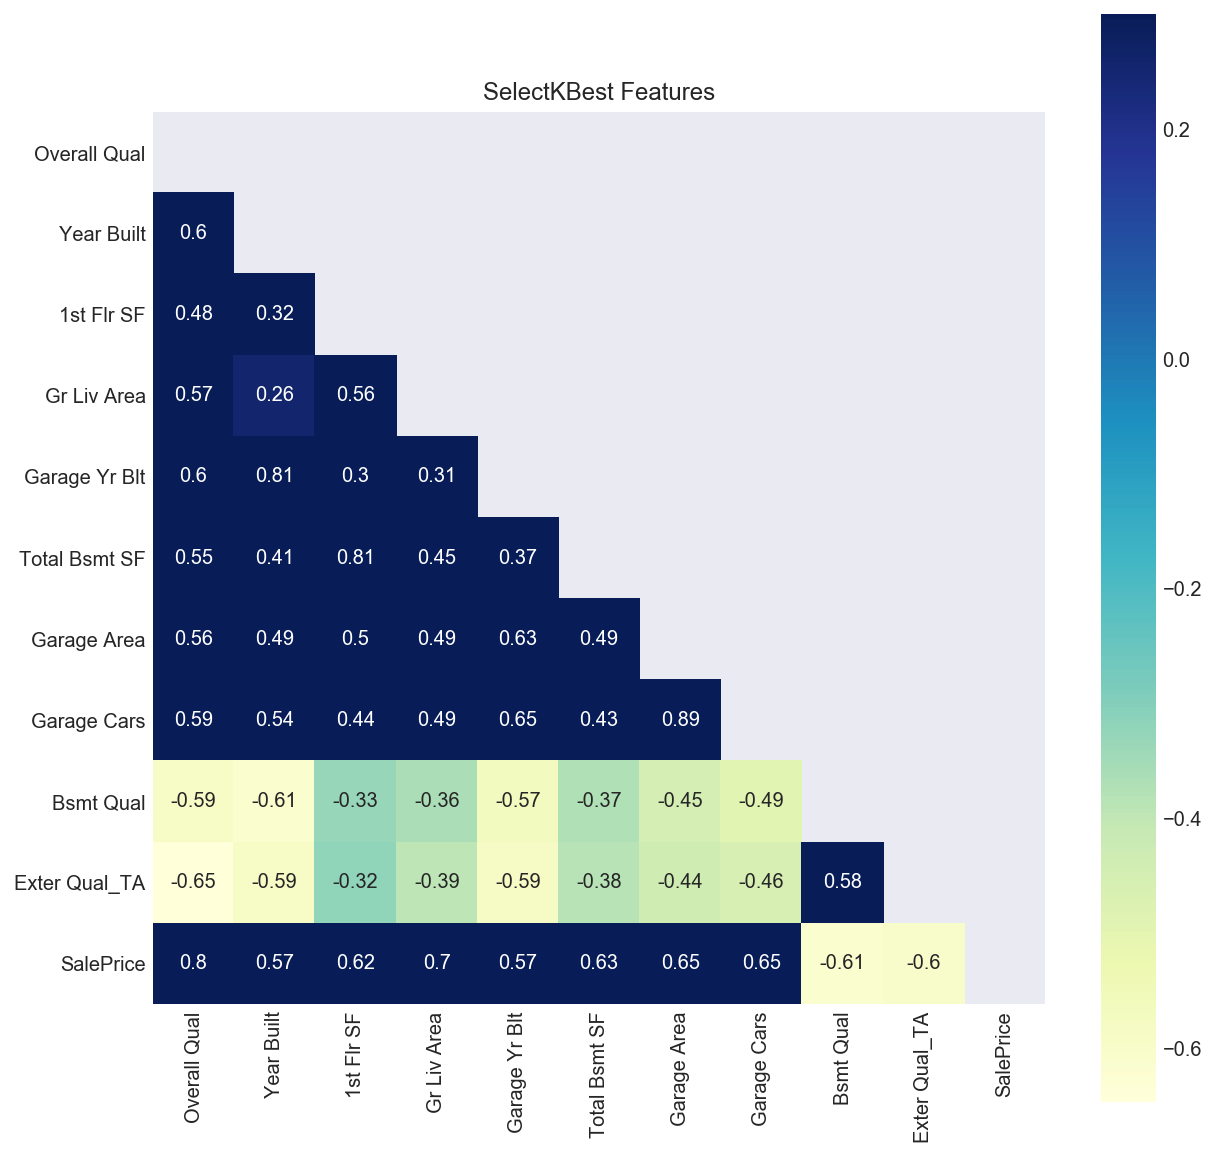

In [46]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True, vmax=.3, square=True, 
                cmap='YlGnBu')
ax.set_title('SelectKBest Features')
figsize=(12,8)
plt.show();

In [47]:
corr_matrix_not_featured = train[['Lot Frontage', 'Mas Vnr Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Total Bsmt SF', 'BsmtFin SF 2', 'BsmtFin SF 1', 'Garage Cars', 
        'Bsmt Unf SF', 'Fireplace Qu', 'Garage Qual', 'SalePrice']].corr()

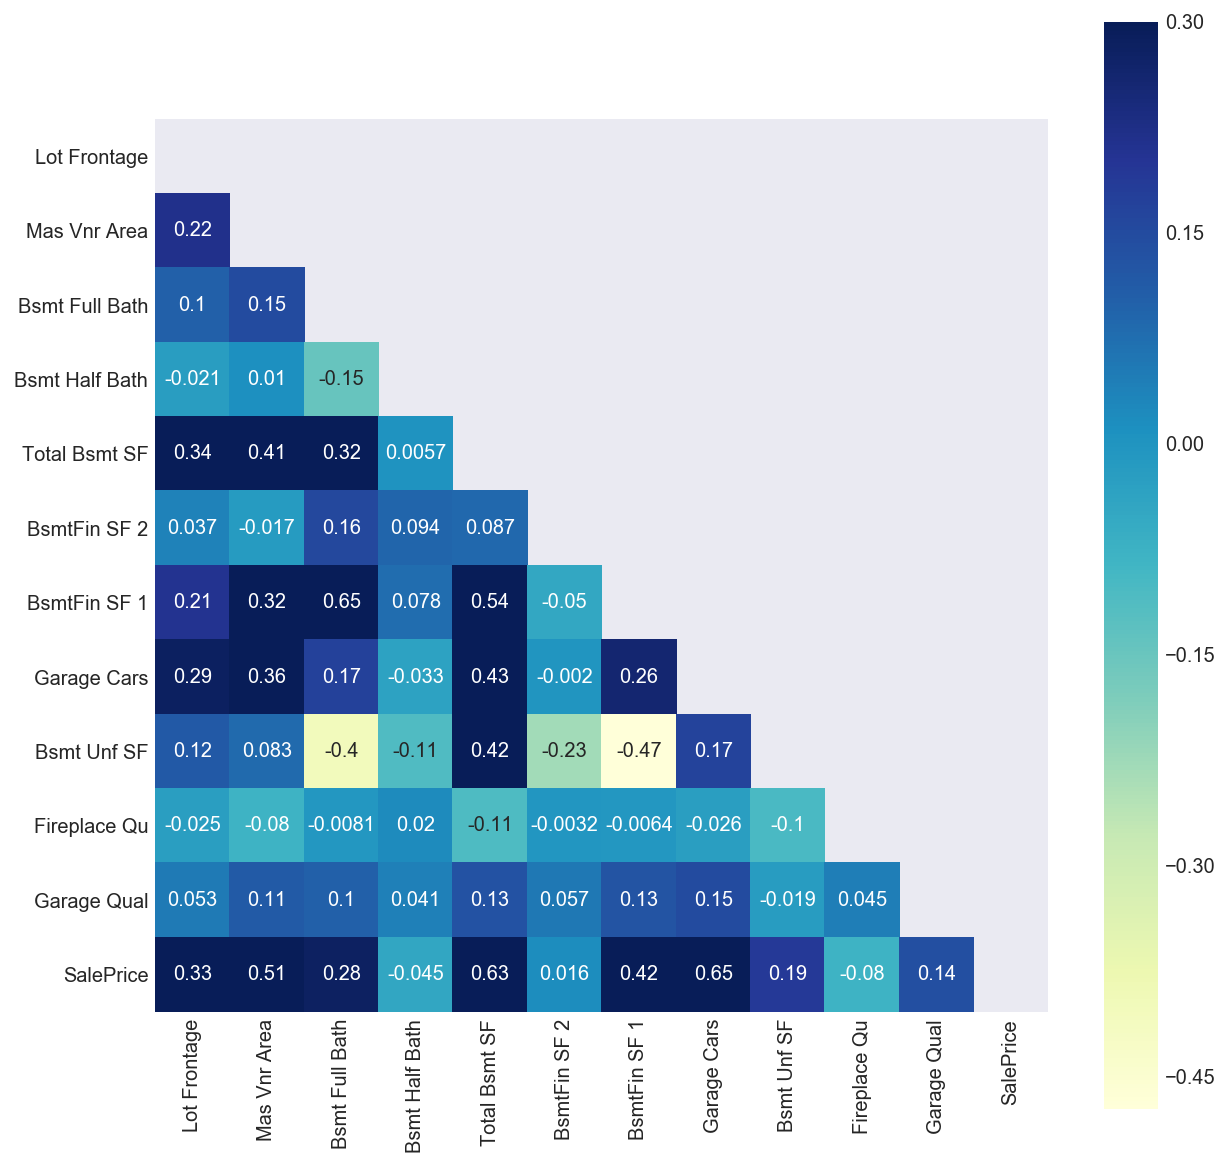

In [48]:
mask = np.zeros_like(corr_matrix_not_featured)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix_not_featured, mask=mask, annot=True, vmax=.3, square=True, cmap='YlGnBu')
figsize=(12,8)

In [49]:
# Train-Train-Split on Train Data Set

from sklearn.model_selection import train_test_split, KFold, cross_val_score

target = ['SalePrice']
not_target = features

X = train[not_target].values
y = train[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Polynomialize Features for Train Dataset

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

target = ['SalePrice']
not_target = features

X = train[not_target]
y = train[target]

pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
model = pf.fit(X_train)
X_train = pf.transform(X_train)
X_test = pf.transform(X_test)

In [51]:
pf.get_feature_names(X.columns)

['Lot Area',
 'Overall Qual',
 'Year Built',
 'Year Remod/Add',
 '1st Flr SF',
 '2nd Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 'Screen Porch',
 'Lot Frontage',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'Bsmt Full Bath',
 'Total Bsmt SF',
 'Garage Area',
 'BsmtFin SF 1',
 'Garage Cars',
 'Bsmt Unf SF',
 'Garage Qual',
 'Garage Cond',
 'Garage Finish',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'Bsmt Qual',
 'MS Zoning_C (all)',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Lot Shape_IR1',
 'Lot Shape_Reg',
 'Land Contour_HLS',
 'Lot Config_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Condition 1_Artery

In [52]:
# Standardize Data Set

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [53]:
# Fit Linear Regression Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(f"LinReg Training Score: {lr.score(X_test_scaled, y_test)}")

LinReg Training Score: -3.1537725509943373


In [54]:
# lr_coefs = pd.DataFrame(list(zip(pf.get_feature_names(X.columns),lr.coef_[0])))
# lr_coefs.set_index(0, inplace=True)

SyntaxError: unexpected EOF while parsing (<ipython-input-54-76d39764867f>, line 2)

In [ ]:
# lr_coefs

In [ ]:
# fig, ax = plt.subplots(figsize=(10,10))
# fig, ax = plt.subplots()
# ax.plot(lr_coefs[1], lr_coefs[0])
# ax = lr_coefs.plot(kind='barh', x=1, y=0)
# lr_coefs.sort_values(1, ascending=False).plot(kind='barh', figsize=(12,8), legend=False);

In [55]:
# Ridge Model

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train_scaled, y_train)

print(optimal_ridge.alpha_)

ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=10)
print(ridge_scores)
print(np.mean(ridge_scores))

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:737: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


2612.675225563329
[0.92560707 0.91010642 0.8957376  0.91921185 0.88218291 0.93993599
 0.94642556 0.83500096 0.6318467  0.89788721]
0.8783942275289005


In [ ]:
# pd.DataFrame(list(zip(pf.get_feature_names(X.columns), ridge.coef_)))

In [56]:
# Lasso Model

from sklearn.linear_model import Lasso, LassoCV

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train_scaled, y_train)

print(optimal_lasso.alpha_)

lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

lasso.fit(X_train_scaled, y_train)

# yhat_optimal_lasso = optimal_lasso.predict(X_testvalues_scaled)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1443.2925939069748
[0.93049843 0.92162565 0.90435776 0.93539514 0.88812721 0.94223814
 0.95334654 0.67201046 0.19937265 0.89502172]
0.8241993695782386


Lasso(alpha=1443.2925939069748, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
lasso_coefs = pd.DataFrame(list(zip(pf.get_feature_names(X.columns), lasso.coef_)))

In [130]:
lasso_coefs.set_index(0, inplace=True)

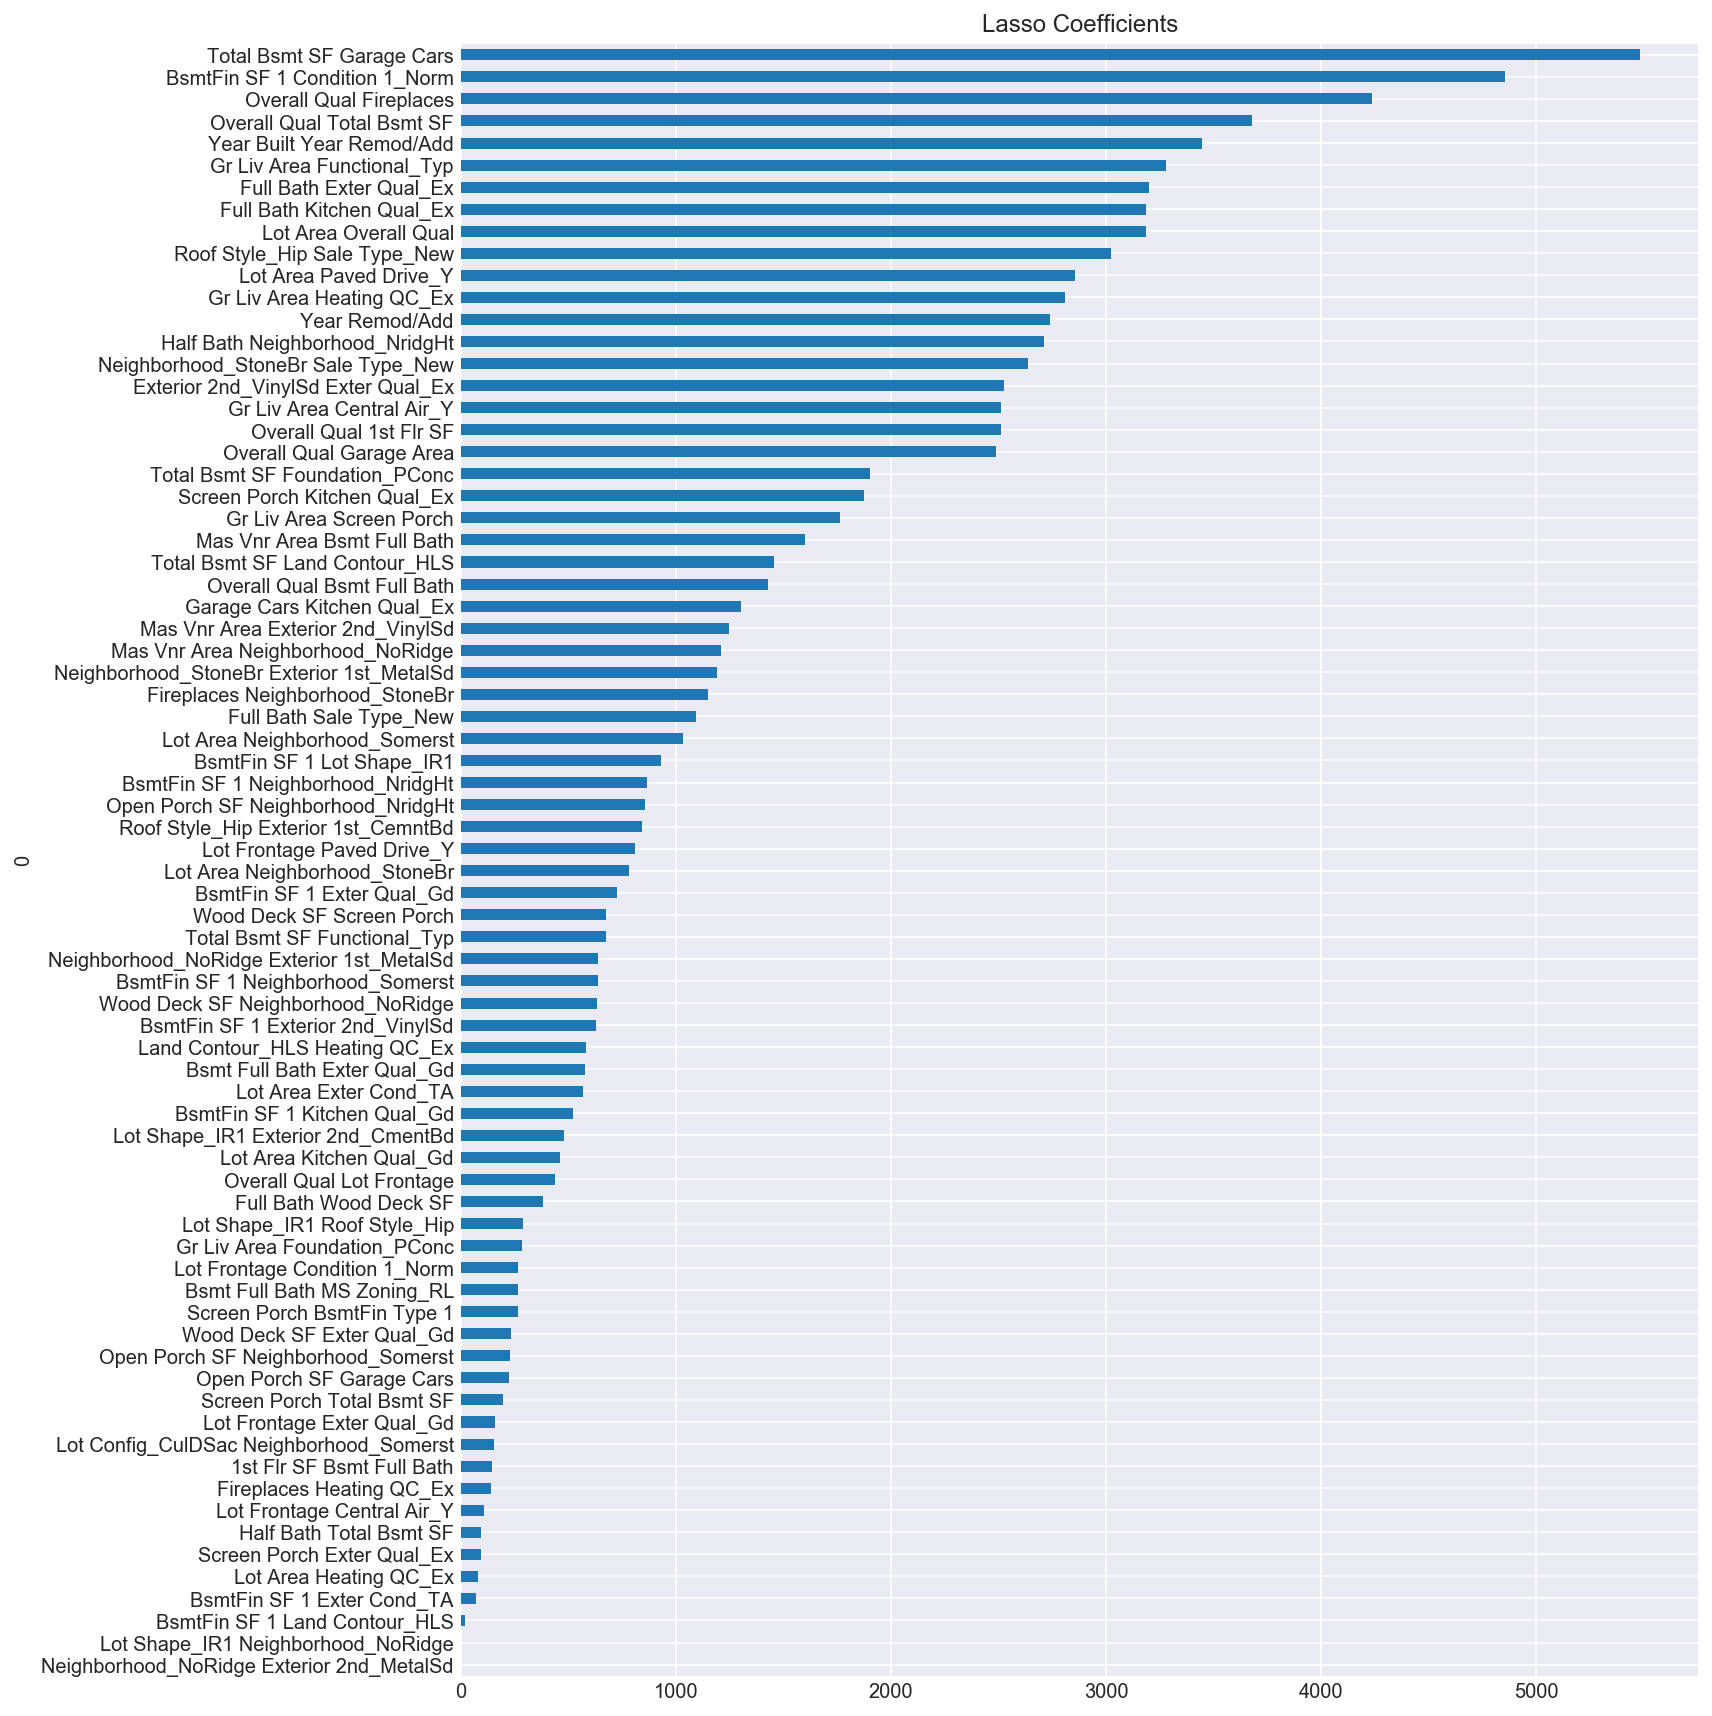

In [137]:
lasso_coefs[lasso_coefs[1] > 0].drop('Overall Qual Gr Liv Area').sort_values(1, 
                                                ascending=True).plot(kind='barh',
                                                figsize=(12,12),
                                                legend=False)
plt.title('Lasso Coefficients')

plt.tight_layout();

In [57]:
# Elastic Net

from sklearn.linear_model import ElasticNet, ElasticNetCV

l1_ratios = np.linspace(0.01, 1.0, 25)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10,
                            verbose=0)
optimal_enet.fit(X_train_scaled, y_train)

print(optimal_enet.alpha_)
print(optimal_enet.l1_ratio_)

enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

enet_scores = cross_val_score(enet, X_train_scaled, y_train, cv=10)

print(enet_scores)
print(np.mean(enet_scores))

# yhat_optimal_enet = optimal_enet.predict(X_testvalues_scaled)

/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1106: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


68.70172527139174
0.9587500000000001


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceW

[0.92644622 0.90736621 0.89399244 0.91649181 0.88051475 0.93432973
 0.94619345 0.83125354 0.63914671 0.90063974]
0.877637459890219


/Users/jessicachace/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


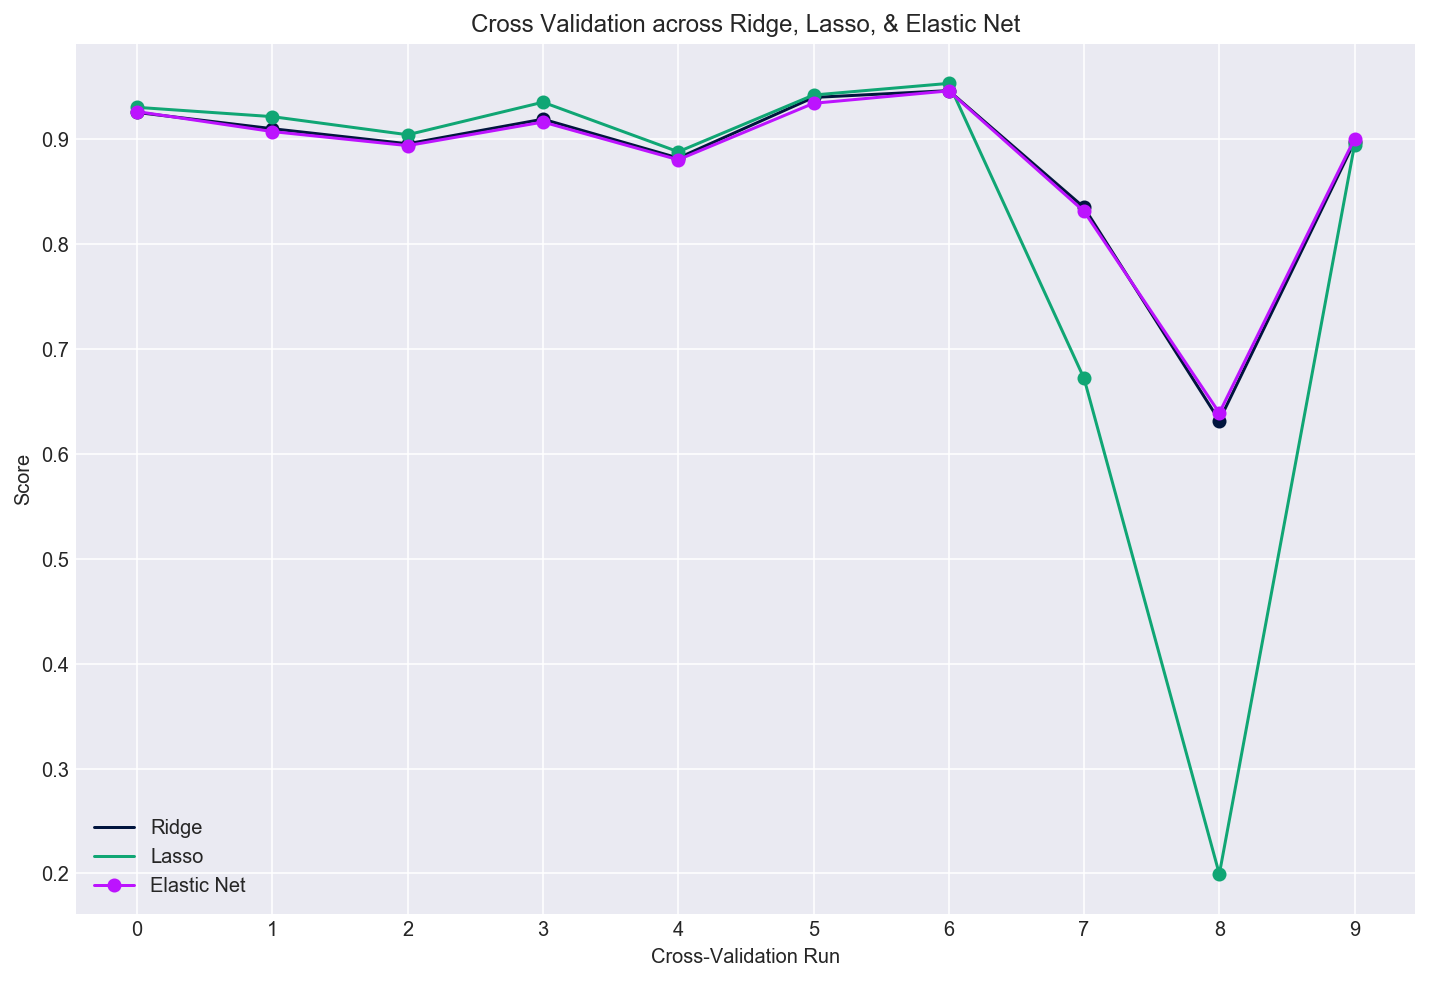

In [153]:
fig = plt.figure(figsize=(12,8))

# plt.subplot(2, 2, 1)
pd.Series(ridge_scores).plot(kind='line', marker='o', color='xkcd:navy', 
                             legend=True, label='Ridge')
# plt.title('Ridge', fontsize=24)
# plt.xlabel('Cross-Validation Run', fontsize=16)
# plt.xticks(rotation='horizontal', fontsize=16)
# plt.ylabel('Score', fontsize=16)
# plt.yticks(fontsize=16)

# plt.subplot(2, 2, 2)
pd.Series(lasso_scores).plot(kind='line', marker='o', color='xkcd:bluish green', 
                             legend=True, label='Lasso')
# plt.title('Lasso', fontsize=24)
# plt.xlabel('Cross-Validation Run', fontsize=16)
# plt.xticks(rotation='horizontal', fontsize=16)
# plt.ylabel('Score', fontsize=16)
# plt.yticks(fontsize=16)

# plt.subplot(2, 2, 3)
pd.Series(enet_scores).plot(kind='line', marker='o', color='xkcd:neon purple', 
                            legend=True, label='Elastic Net')
plt.title('Cross Validation across Ridge, Lasso, & Elastic Net')
plt.xlabel('Cross-Validation Run')
plt.xticks(np.arange(0, 10, step=1), rotation='horizontal')
plt.ylabel('Score');
# plt.yticks(fontsize=16);

In [ ]:
>>> barlist=plt.bar([1,2,3,4], [1,2,3,4])
>>> barlist[0].set_color('r')
>>> plt.show()

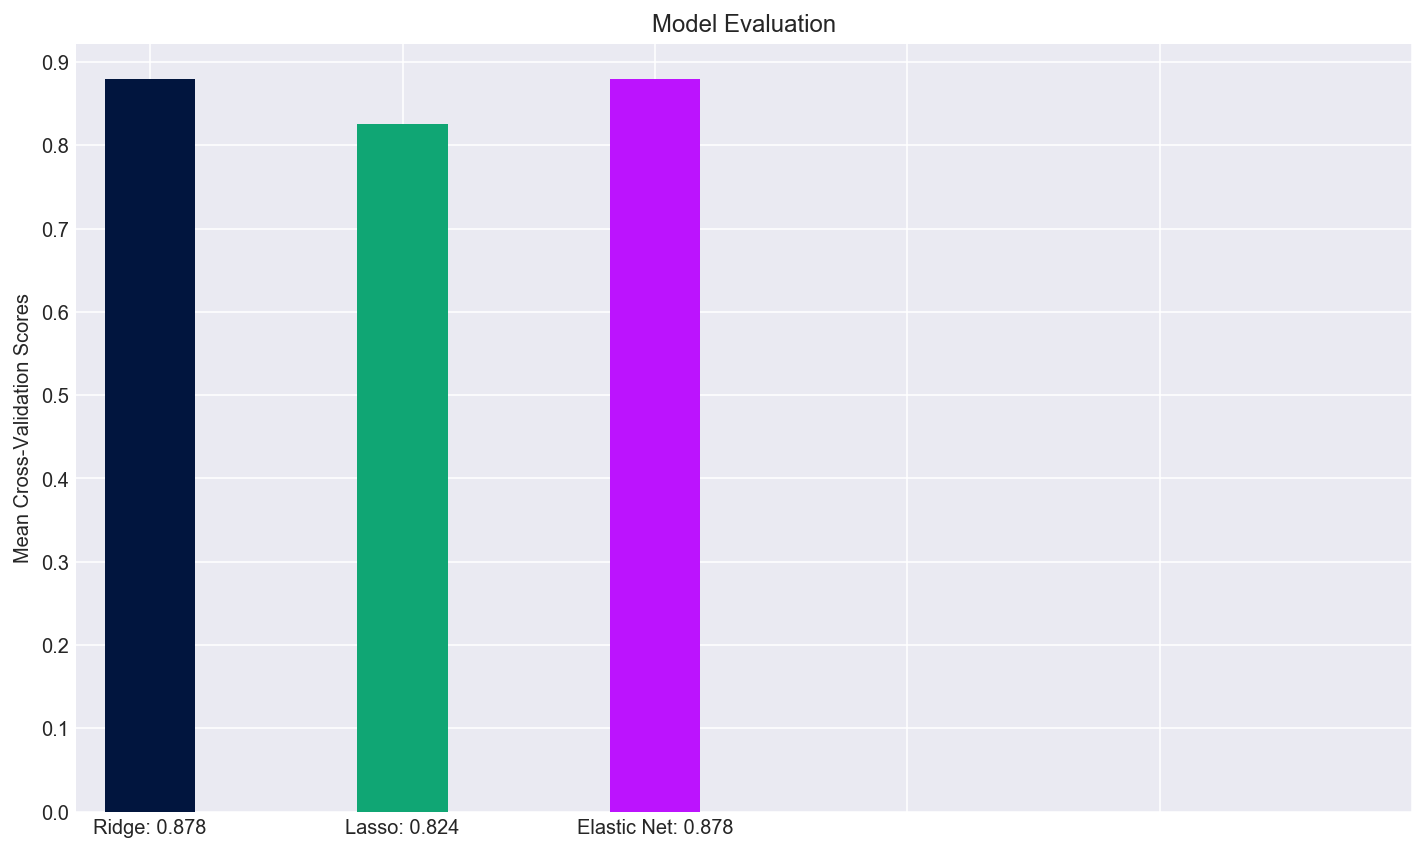

In [99]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6),
          facecolor='w',
          edgecolor='r')

N = 3
mean_test_score = (0.878, 0.824, 0.878)

# std_test_score = (0.040278, 0.021345, 0.006183, 0.014183, 0.0, 0.0)

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

barlist = plt.bar(ind, mean_test_score, width)
barlist[0].set_color('xkcd:navy')
barlist[1].set_color('xkcd:bluish green')
barlist[2].set_color('xkcd:neon purple')

plt.ylabel('Mean Cross-Validation Scores')
plt.title('Model Evaluation')
plt.xticks(np.arange(6),['Ridge: 0.878', 'Lasso: 0.824', 'Elastic Net: 0.878'])
plt.yticks(np.arange(0, 1.0, 0.1))
# plt.axhline(y=0.42779999999999996, linewidth=4, color='#FF4500')

plt.tight_layout();